# Exploratory Data Analysis - Terrorism 

### Importing important libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()
from warnings import filterwarnings
filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
import math

In [38]:
# Reading the data of CSV file
a = pd.read_csv("globalterrorism.csv")

In [39]:
# Creating a dataframe for dataset
df = pd.DataFrame(a)

In [40]:
# Displaying the sample data of dataset
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970000e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970000e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970000e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [41]:
# Showcasing the mean,std,frequency,min,max for the dataframe
df.describe(include = 'all')

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
count,1.816910e+05,181691.000000,181691.000000,181691.000000,9239,181691.000000,2220,181691.000000,181691,181691.000000,...,28289,115500,76933,43516,181691,181691.000000,181691.000000,181691.000000,181691.000000,25038
unique,NaN,NaN,NaN,NaN,2244,NaN,1859,NaN,205,NaN,...,15429,83988,62263,36090,26,NaN,NaN,NaN,NaN,14306
top,NaN,NaN,NaN,NaN,"September 18-24, 2016",NaN,8/4/1998,NaN,Iraq,NaN,...,Casualty numbers for this incident conflict ac...,Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...","Christopher Hewitt, ""Political Violence and Te...",START Primary Collection,NaN,NaN,NaN,NaN,"201612010023, 201612010024, 201612010025, 2016..."
freq,NaN,NaN,NaN,NaN,101,NaN,18,NaN,24636,NaN,...,1607,205,134,139,78002,NaN,NaN,NaN,NaN,80
mean,2.003238e+11,2002.638997,6.467277,15.505644,NaN,0.045346,NaN,131.968501,NaN,7.160938,...,NaN,NaN,NaN,NaN,NaN,-4.543731,-4.464398,0.090010,-3.945952,NaN
std,1.383523e+09,13.259430,3.388303,8.814045,NaN,0.208063,NaN,112.414535,NaN,2.933408,...,NaN,NaN,NaN,NaN,NaN,4.543547,4.637152,0.568457,4.691325,NaN
min,1.970000e+11,1970.000000,0.000000,0.000000,NaN,0.000000,NaN,4.000000,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,-9.000000,-9.000000,-9.000000,-9.000000,NaN
25%,1.990000e+11,1991.000000,4.000000,8.000000,NaN,0.000000,NaN,78.000000,NaN,5.000000,...,NaN,NaN,NaN,NaN,NaN,-9.000000,-9.000000,0.000000,-9.000000,NaN
50%,2.010000e+11,2009.000000,6.000000,15.000000,NaN,0.000000,NaN,98.000000,NaN,6.000000,...,NaN,NaN,NaN,NaN,NaN,-9.000000,-9.000000,0.000000,0.000000,NaN
75%,2.010000e+11,2014.000000,9.000000,23.000000,NaN,0.000000,NaN,160.000000,NaN,10.000000,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN


In [42]:
# Creating the list for showcasing name of all columns
list(df.columns)

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [43]:
# Showcasing the number of rows and columns
df.shape

(181691, 135)

In [44]:
# Displaying the information for the dataset
df.info

<bound method DataFrame.info of              eventid  iyear  imonth  iday approxdate  extended resolution  \
0       1.970000e+11   1970       7     2        NaN         0        NaN   
1       1.970000e+11   1970       0     0        NaN         0        NaN   
2       1.970000e+11   1970       1     0        NaN         0        NaN   
3       1.970000e+11   1970       1     0        NaN         0        NaN   
4       1.970000e+11   1970       1     0        NaN         0        NaN   
...              ...    ...     ...   ...        ...       ...        ...   
181686  2.020000e+11   2017      12    31        NaN         0        NaN   
181687  2.020000e+11   2017      12    31        NaN         0        NaN   
181688  2.020000e+11   2017      12    31        NaN         0        NaN   
181689  2.020000e+11   2017      12    31        NaN         0        NaN   
181690  2.020000e+11   2017      12    31        NaN         0        NaN   

        country         country_txt  region

In [45]:
# Checking for the missing values in Dataset 
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values

gsubname3           181671
weapsubtype4_txt    181621
weapsubtype4        181621
weaptype4           181618
weaptype4_txt       181618
                     ...  
suicide                  0
success                  0
crit3                    0
property                 0
eventid                  0
Length: 135, dtype: int64

In [46]:
# Showcasing the percentage of missing values
missing_values = (df.isnull().sum().sort_values(ascending=False)/len(df))*100
missing_values

gsubname3           99.988992
weapsubtype4_txt    99.961473
weapsubtype4        99.961473
weaptype4           99.959822
weaptype4_txt       99.959822
                      ...    
suicide              0.000000
success              0.000000
crit3                0.000000
property             0.000000
eventid              0.000000
Length: 135, dtype: float64

In [47]:
len(df)

181691

In [48]:
# Checking for the number of duplicates
df.duplicated().any().sum()

1

In [49]:
# Creating a list for the columns to be dropped
drop_columns = list(missing_values[missing_values>15].index.values)
drop_columns

['gsubname3',
 'weapsubtype4_txt',
 'weapsubtype4',
 'weaptype4',
 'weaptype4_txt',
 'claimmode3',
 'claimmode3_txt',
 'gsubname2',
 'claim3',
 'guncertain3',
 'gname3',
 'divert',
 'attacktype3',
 'attacktype3_txt',
 'ransomnote',
 'ransompaidus',
 'ransomamtus',
 'claimmode2',
 'claimmode2_txt',
 'ransompaid',
 'corp3',
 'targsubtype3',
 'targsubtype3_txt',
 'natlty3_txt',
 'natlty3',
 'target3',
 'targtype3',
 'targtype3_txt',
 'ransomamt',
 'weapsubtype3_txt',
 'weapsubtype3',
 'weaptype3_txt',
 'weaptype3',
 'claim2',
 'guncertain2',
 'gname2',
 'resolution',
 'kidhijcountry',
 'nhours',
 'compclaim',
 'gsubname',
 'attacktype2',
 'attacktype2_txt',
 'ndays',
 'approxdate',
 'corp2',
 'nreleased',
 'targsubtype2',
 'targsubtype2_txt',
 'natlty2',
 'natlty2_txt',
 'hostkidoutcome_txt',
 'hostkidoutcome',
 'target2',
 'targtype2_txt',
 'targtype2',
 'weapsubtype2',
 'weapsubtype2_txt',
 'weaptype2',
 'weaptype2_txt',
 'nhostkidus',
 'nhostkid',
 'claimmode_txt',
 'claimmode',
 'rela

In [50]:
# Dropping the columns
df.drop(drop_columns,inplace=True,axis=1)

In [51]:
# Showcasing the number columns that left after dropping the columns of missing values
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'target1', 'natlty1', 'natlty1_txt', 'gname',
       'guncertain1', 'individual', 'weaptype1', 'weaptype1_txt',
       'weapsubtype1', 'weapsubtype1_txt', 'nkill', 'nwound', 'property',
       'ishostkid', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [52]:
# Showcasing the number columns and rows that left after dropping the columns of missing values
df.shape

(181691, 47)

In [53]:
# Finding the percentage of missing values in dataframe 
missing_values = (df.isna().sum().sort_values(ascending= False)/len(df))*100
missing_values

weapsubtype1        11.430396
weapsubtype1_txt    11.430396
nwound               8.977330
targsubtype1_txt     5.709144
targsubtype1         5.709144
nkill                5.676120
longitude            2.508104
latitude             2.507554
natlty1              0.858050
natlty1_txt          0.858050
target1              0.350045
city                 0.238867
provstate            0.231712
guncertain1          0.209146
ishostkid            0.097969
specificity          0.003302
doubtterr            0.000550
multiple             0.000550
individual           0.000000
INT_MISC             0.000000
gname                0.000000
weaptype1_txt        0.000000
weaptype1            0.000000
property             0.000000
INT_IDEO             0.000000
INT_LOG              0.000000
dbsource             0.000000
eventid              0.000000
attacktype1_txt      0.000000
targtype1_txt        0.000000
targtype1            0.000000
imonth               0.000000
iday                 0.000000
extended  

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 47 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  float64
 1   iyear             181691 non-null  int64  
 2   imonth            181691 non-null  int64  
 3   iday              181691 non-null  int64  
 4   extended          181691 non-null  int64  
 5   country           181691 non-null  int64  
 6   country_txt       181691 non-null  object 
 7   region            181691 non-null  int64  
 8   region_txt        181691 non-null  object 
 9   provstate         181270 non-null  object 
 10  city              181257 non-null  object 
 11  latitude          177135 non-null  float64
 12  longitude         177134 non-null  float64
 13  specificity       181685 non-null  float64
 14  vicinity          181691 non-null  int64  
 15  crit1             181691 non-null  int64  
 16  crit2             18

In [55]:
# Droppint the unnecessary columns
df.drop(columns={'eventid','extended','iday','country','targsubtype1','region','weaptype1','weapsubtype1','specificity','vicinity','crit1','crit2','crit3','doubtterr','multiple','suicide',
                  'attacktype1','targtype1','targsubtype1_txt','target1','natlty1_txt','guncertain1','individual','weapsubtype1_txt','property','dbsource','INT_LOG','INT_IDEO','INT_MISC','INT_ANY'
                  },inplace=True,axis=1)

In [56]:
df.shape

(181691, 17)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            181691 non-null  int64  
 1   imonth           181691 non-null  int64  
 2   country_txt      181691 non-null  object 
 3   region_txt       181691 non-null  object 
 4   provstate        181270 non-null  object 
 5   city             181257 non-null  object 
 6   latitude         177135 non-null  float64
 7   longitude        177134 non-null  float64
 8   success          181691 non-null  int64  
 9   attacktype1_txt  181691 non-null  object 
 10  targtype1_txt    181691 non-null  object 
 11  natlty1          180132 non-null  float64
 12  gname            181691 non-null  object 
 13  weaptype1_txt    181691 non-null  object 
 14  nkill            171378 non-null  float64
 15  nwound           165380 non-null  float64
 16  ishostkid        181513 non-null  floa

In [58]:
df.head()

,iyear,imonth,country_txt,region_txt,provstate,city,latitude,longitude,success,attacktype1_txt,targtype1_txt,natlty1,gname,weaptype1_txt,nkill,nwound,ishostkid
0,1970,7,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,Assassination,Private Citizens & Property,58.0,MANO-D,Unknown,1.0,0.0,0.0
1,1970,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),Government (Diplomatic),21.0,23rd of September Communist League,Unknown,0.0,0.0,1.0
2,1970,1,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,Assassination,Journalists & Media,217.0,Unknown,Unknown,1.0,0.0,0.0
3,1970,1,Greece,Western Europe,Attica,Athens,37.997490,23.762728,1,Bombing/Explosion,Government (Diplomatic),217.0,Unknown,Explosives,NaN,NaN,0.0
4,1970,1,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,Facility/Infrastructure Attack,Government (Diplomatic),217.0,Unknown,Incendiary,NaN,NaN,0.0


In [59]:
# Showcasing the columns after dropping unnecessary columns
df.columns

Index(['iyear', 'imonth', 'country_txt', 'region_txt', 'provstate', 'city',
       'latitude', 'longitude', 'success', 'attacktype1_txt', 'targtype1_txt',
       'natlty1', 'gname', 'weaptype1_txt', 'nkill', 'nwound', 'ishostkid'],
      dtype='object')

In [60]:
# Renaming the columns
df = df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','success':'Success','attacktype1_txt':'Attack_type','targtype1_txt':'Target_type','targsubtype1_txt':'Target_subtype','gname':'Gang_name','weaptype1_txt':'Weapon_Type','nkill':'Kills','nwound':'Wounds'})

In [61]:
# Showcasing the renamed columns
df.columns

Index(['Year', 'Month', 'Country', 'Region', 'State', 'City', 'latitude',
       'longitude', 'Success', 'Attack_type', 'Target_type', 'natlty1',
       'Gang_name', 'Weapon_Type', 'Kills', 'Wounds', 'ishostkid'],
      dtype='object')

In [62]:
# Replacing the Na values of columns with Unknown
df['State'] = df['State'].fillna('Unknown')
df['City'] = df['City'].fillna('Unknown')
df['Target_type'] = df['Target_type'].fillna("Others")
df['Kills'] = df['Kills'].fillna(0)
df['Wounds'] = df['Wounds'].fillna(0)
df['victims'] = df['Kills'] + df['Wounds']

In [63]:
# Checking for the number of unique values 
df[['Country','Region','Target_type','Attack_type','Gang_name','Weapon_Type']].nunique()

Country         205
Region           12
Target_type      22
Attack_type       9
Gang_name      3537
Weapon_Type      12
dtype: int64

In [64]:
df.head()

,Year,Month,Country,Region,State,City,latitude,longitude,Success,Attack_type,Target_type,natlty1,Gang_name,Weapon_Type,Kills,Wounds,ishostkid,victims
0,1970,7,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,18.456792,-69.951164,1,Assassination,Private Citizens & Property,58.0,MANO-D,Unknown,1.0,0.0,0.0,1.0
1,1970,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),Government (Diplomatic),21.0,23rd of September Communist League,Unknown,0.0,0.0,1.0,0.0
2,1970,1,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,Assassination,Journalists & Media,217.0,Unknown,Unknown,1.0,0.0,0.0,1.0
3,1970,1,Greece,Western Europe,Attica,Athens,37.997490,23.762728,1,Bombing/Explosion,Government (Diplomatic),217.0,Unknown,Explosives,0.0,0.0,0.0,0.0
4,1970,1,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,Facility/Infrastructure Attack,Government (Diplomatic),217.0,Unknown,Incendiary,0.0,0.0,0.0,0.0


# Univariate Analysis

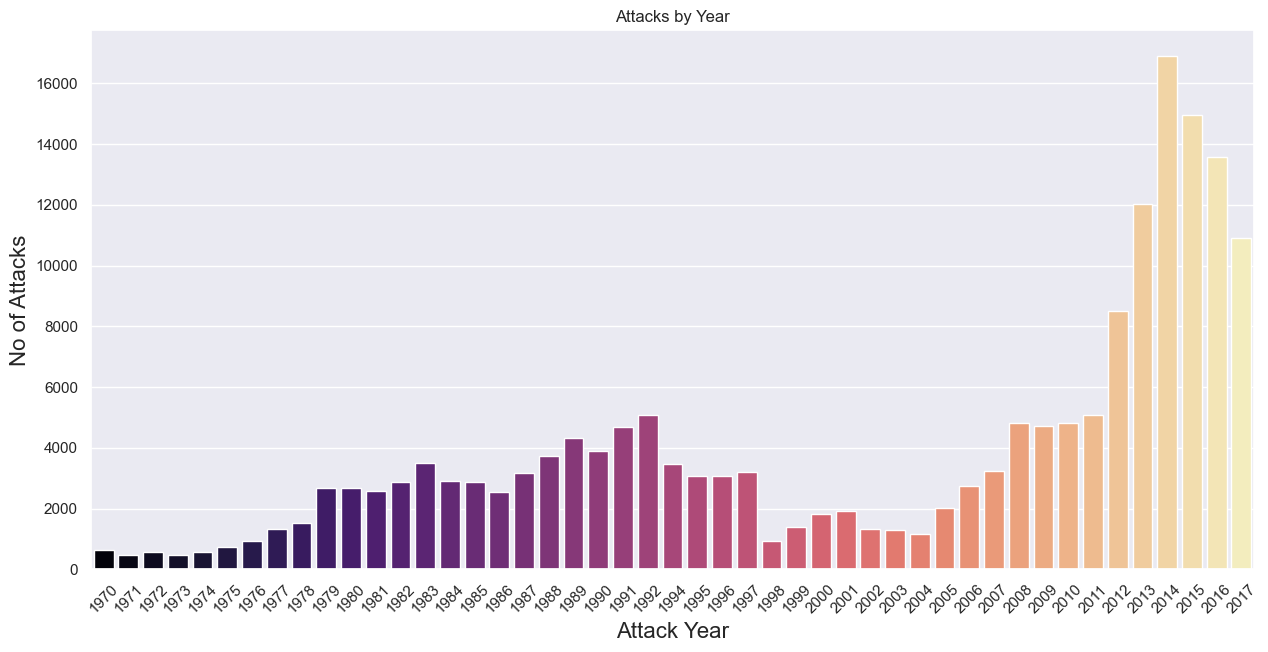

In [65]:
# No of Attacks Vs Year - Analysis graph
plt.figure(figsize=(15,7))
ax = df['Year'].unique()
ay = df['Year'].value_counts(dropna=False).sort_index()
sns.barplot(x = ax,y = ay, palette = "magma")
plt.xticks(rotation=45)
plt.ylabel('No of Attacks',fontsize= 16)
plt.xlabel("Attack Year",fontsize= 16)
plt.title("Attacks by Year")
plt.show()

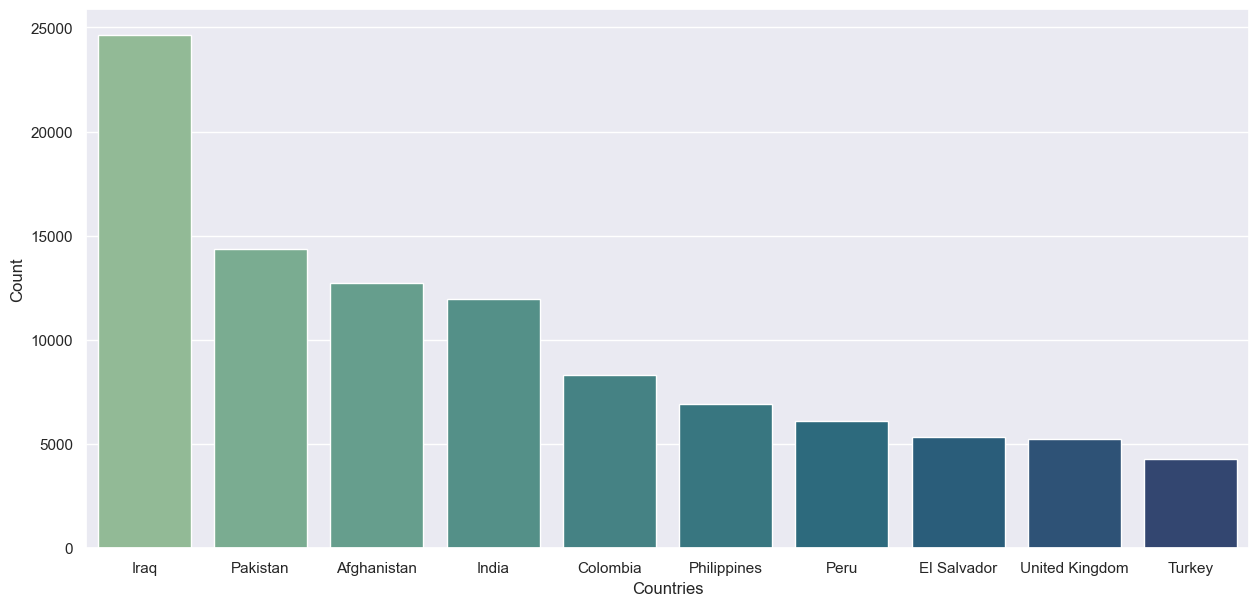

In [66]:
# Creating a graph for terrorist attack count vs countries  
plt.figure(figsize=(15,7))
sns.barplot(x=df['Country'].value_counts()[:10].index , y = df['Country'].value_counts()[:10].values,palette = 'crest')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title
plt.show()           

In [67]:
# Checking for percentage of variables present in dataset
(df['Target_type'].value_counts().head(10)/df['Target_type'].shape[0])*100

Private Citizens & Property       23.947801
Military                          15.401974
Police                            13.487735
Government (General)              11.713844
Business                          11.375907
Transportation                     3.742068
Utilities                          3.314969
Unknown                            3.246171
Religious Figures/Institutions     2.443709
Educational Institution            2.378764
Name: Target_type, dtype: float64

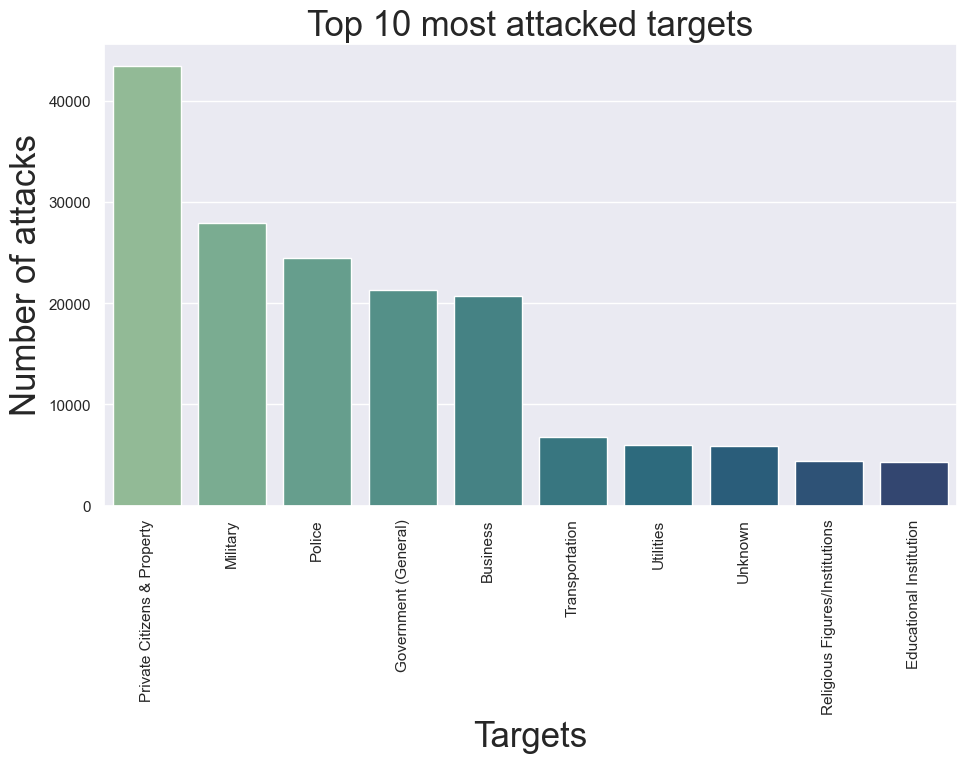

In [68]:
# Graph for Top 10 most attacked targets
plt.figure(figsize = (11,6))
sns.barplot(x = df['Target_type'].value_counts().head(10).index,y = df['Target_type'].value_counts().head(10).values, 
            palette = 'crest')
plt.title('Top 10 most attacked targets',fontsize=25)
plt.xlabel('Targets',fontsize=25)
plt.ylabel('Number of attacks',fontsize=25)
plt.xticks(rotation=90)
plt.show()

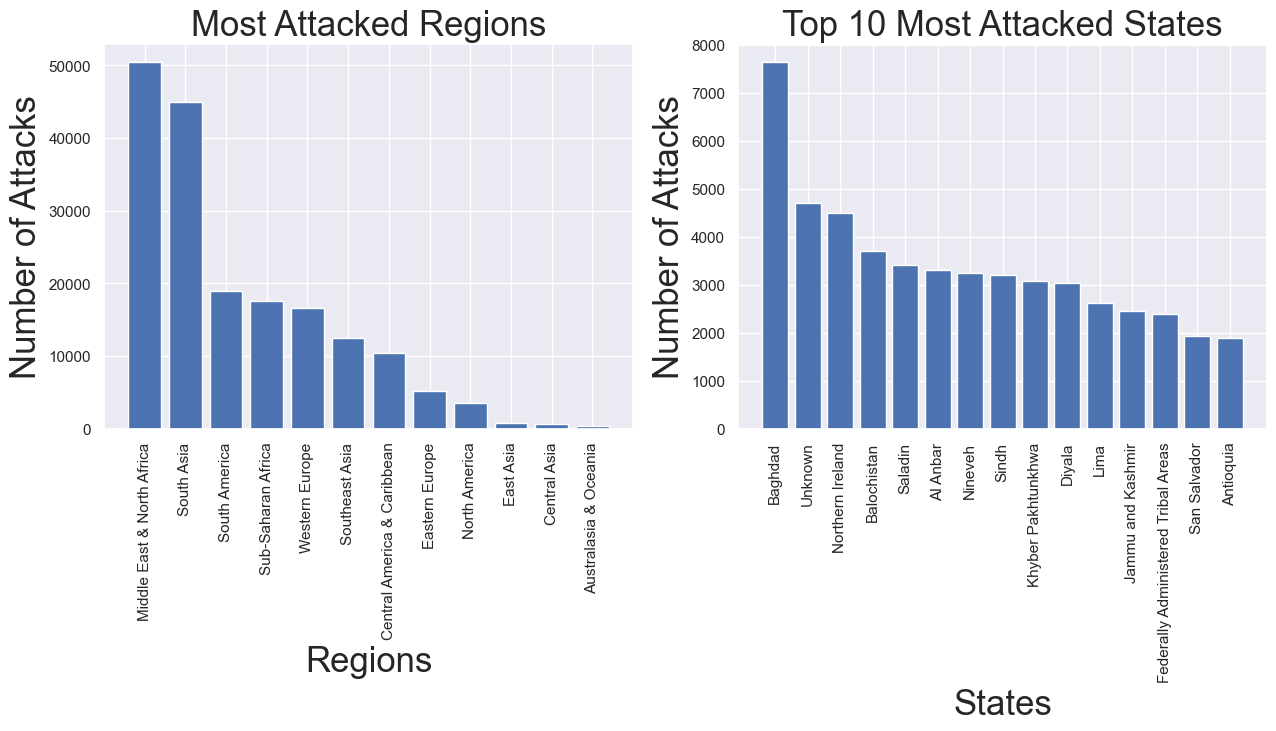

In [69]:
#displaying more attacked states and regions
plt.subplot(1,2,1)
# regions with most attacks 
plt.bar(df['Region'].value_counts().index, df['Region'].value_counts().values,data=df)
plt.title('Most Attacked Regions',fontsize=25)
plt.xlabel('Regions',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=25)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.bar(df['State'].value_counts().head(15).index, df['State'].value_counts().head(15).values,data=df)
plt.title('Top 10 Most Attacked States',fontsize=25)
plt.xlabel('States',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=25)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 5)

In [70]:
#displaying top 5 most weapons type used in attacks
(df['Weapon_Type'].value_counts().head()/df['Weapon_Type'].shape[0])*100

Explosives    50.869883
Firearms      32.210731
Unknown        8.342185
Incendiary     6.128537
Melee          2.011657
Name: Weapon_Type, dtype: float64

Text(0, 0.5, 'Number of Weapon Used')

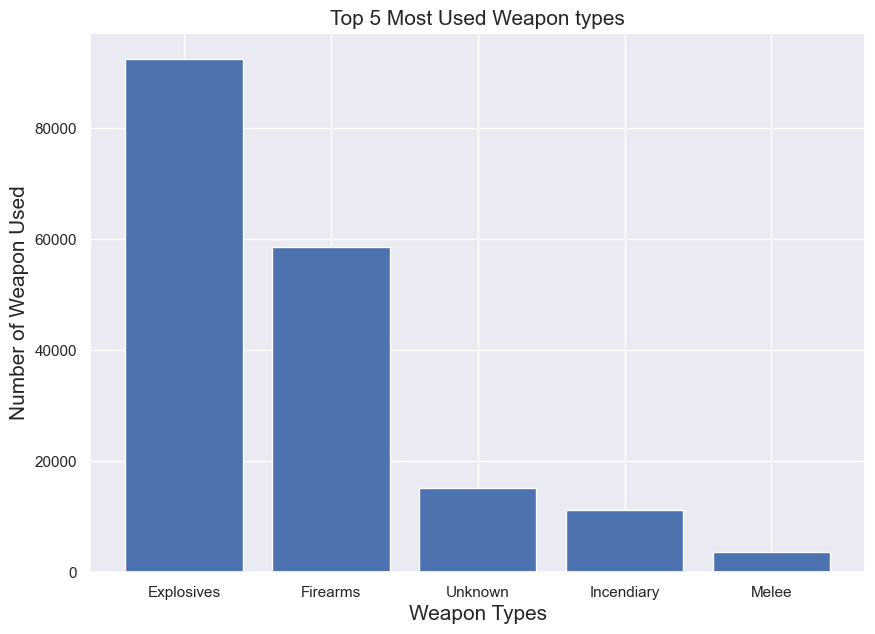

In [71]:
plt.figure(figsize=(10,7))
plt.bar(df['Weapon_Type'].value_counts().head().index, df['Weapon_Type'].value_counts().head().values,data=df)
plt.title('Top 5 Most Used Weapon types',fontsize=15)
plt.xlabel('Weapon Types',fontsize=15)
plt.ylabel('Number of Weapon Used',fontsize=15)

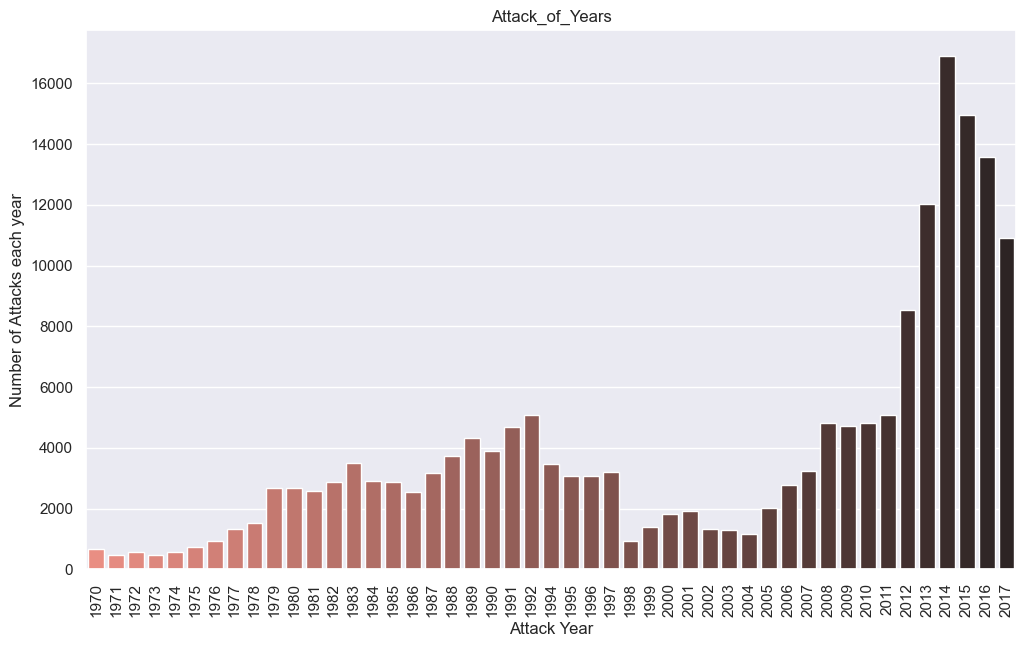

In [72]:
x_year = df['Year'].unique()
y_count_years =df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (12,7))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'dark:salmon_r')
plt.xticks(rotation = 90)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')
plt.show()

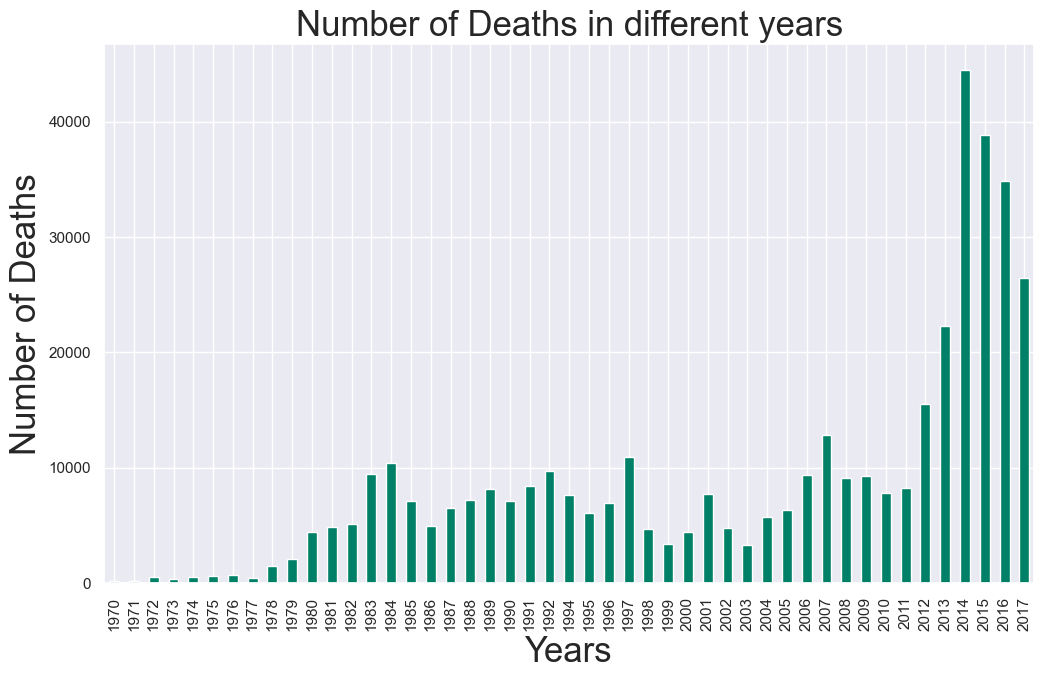

In [73]:
plt.figure(figsize = (12,7))
df.groupby(['Year'])['Kills'].sum().plot(kind='bar',colormap='summer')
plt.title('Number of Deaths in different years',fontsize=25)
plt.xlabel('Years',fontsize=25)
plt.ylabel('Number of Deaths',fontsize=25)
plt.xticks(rotation=90)
plt.show()

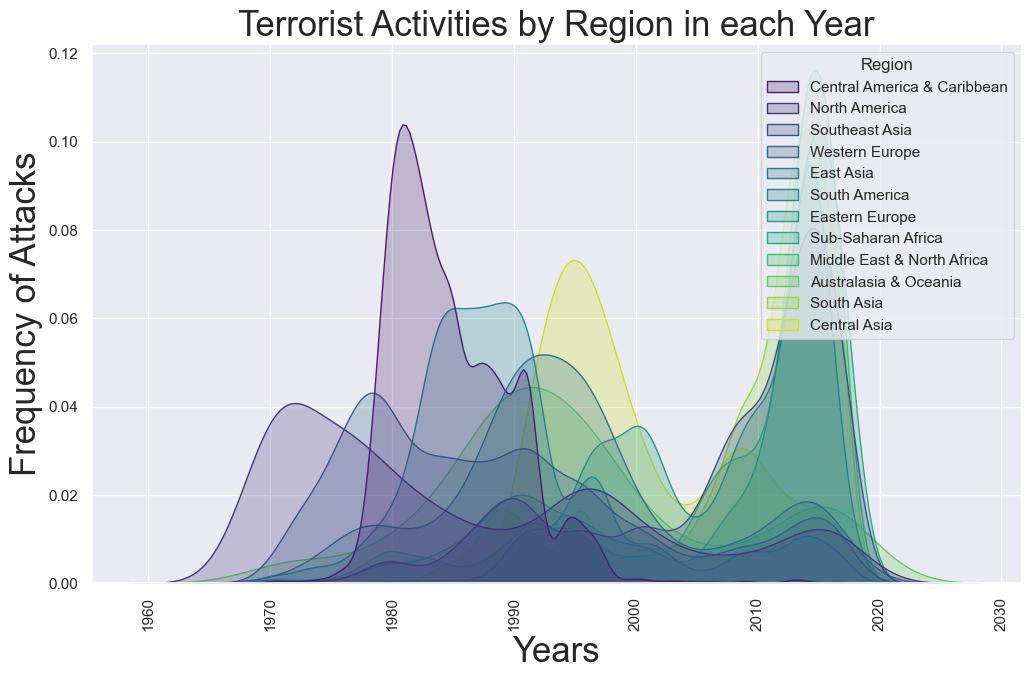

In [74]:
plt.figure(figsize = (12,7))
sns.kdeplot(data=df, x='Year', hue='Region',common_norm=False,  fill=True, palette='viridis')
plt.title('Terrorist Activities by Region in each Year',fontsize=25)
plt.xlabel('Years',fontsize=25)
plt.ylabel('Frequency of Attacks',fontsize=25)
plt.xticks(rotation=90)
plt.show()

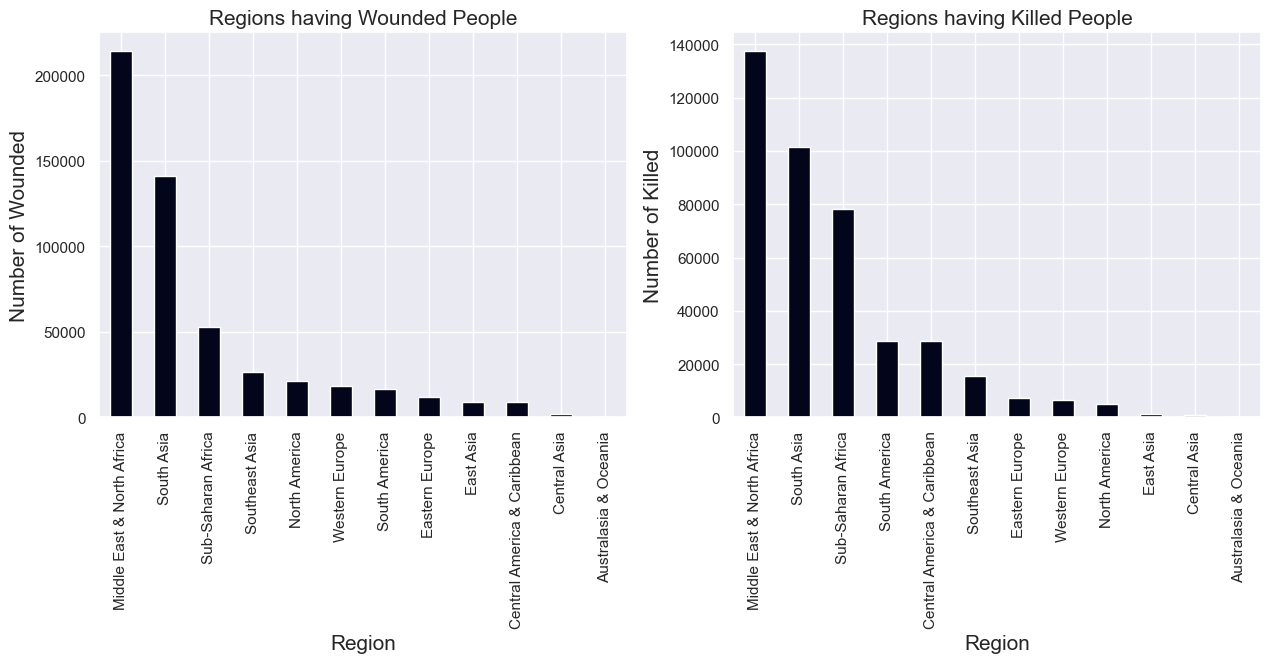

In [75]:
plt.subplot(1,2,1)

df.groupby(['Region'])['Wounds'].sum().sort_values(ascending = False).plot(kind='bar',colormap='rocket')
plt.title('Regions having Wounded People',fontsize=15)
plt.xlabel('Region',fontsize=15)
plt.ylabel('Number of Wounded',fontsize=15)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
df.groupby(['Region'])['Kills'].sum().sort_values(ascending = False).plot(kind='bar',colormap='rocket')
plt.title('Regions having Killed People',fontsize=15)
plt.xlabel('Region',fontsize=15)
plt.ylabel('Number of Killed',fontsize=15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 5)

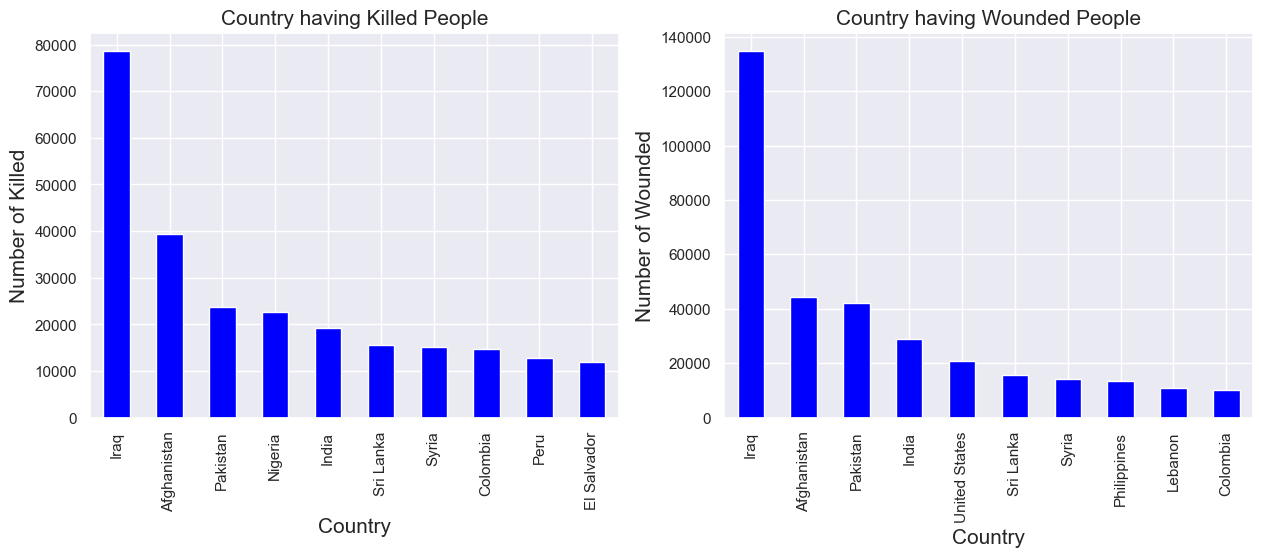

In [76]:
plt.subplot(1,2,2)

df1=df.groupby(['Country'])['Wounds'].sum().sort_values(ascending = False).head(10).plot(kind='bar',colormap='winter')
plt.title('Country having Wounded People',fontsize=15)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Number of Wounded',fontsize=15)
plt.xticks(rotation=90)

plt.subplot(1,2,1)
df.groupby(['Country'])['Kills'].sum().sort_values(ascending = False).head(10).plot(kind='bar',colormap='winter')
plt.title('Country having Killed People',fontsize=15)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Number of Killed',fontsize=15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 5)

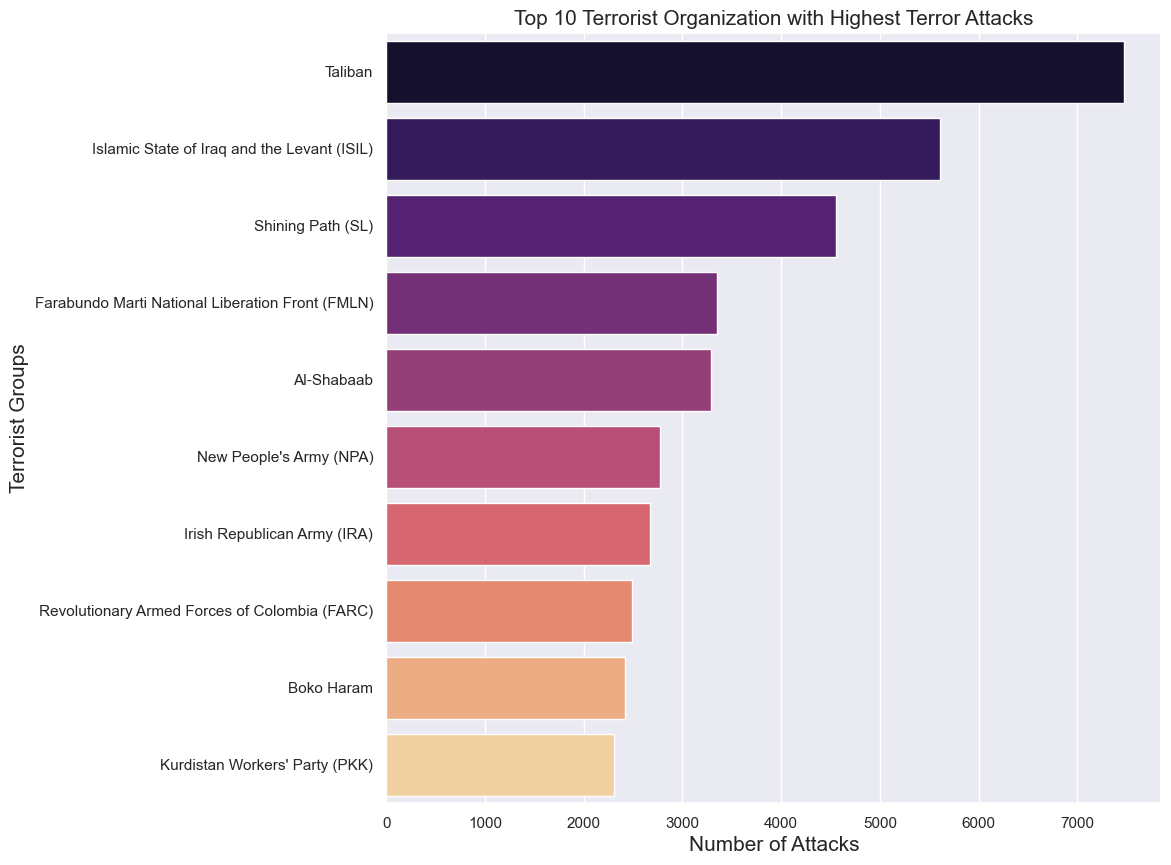

In [77]:
plt.figure(figsize=(10,10))
sns.barplot(x=df['Gang_name'].value_counts()[1:11].values,y=df['Gang_name'].value_counts()[1:11].index,palette = 'magma')
plt.title('Top 10 Terrorist Organization with Highest Terror Attacks',fontsize=15)
plt.xlabel('Number of Attacks',fontsize=15)
plt.ylabel('Terrorist Groups',fontsize=15)
plt.show()

## Creating a new dataframe for Gang Taliban

In [78]:
df1 = df[df.Gang_name == 'Taliban']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 [Text(0, 0, '1970'),
  Text(1, 0, '1971'),
  Text(2, 0, '1972'),
  Text(3, 0, '1973'),
  Text(4, 0, '1974'),
  Text(5, 0, '1975'),
  Text(6, 0, '1976'),
  Text(7, 0, '1977'),
  Text(8, 0, '1978'),
  Text(9, 0, '1979'),
  Text(10, 0, '1980'),
  Text(11, 0, '1981'),
  Text(12, 0, '1982'),
  Text(13, 0, '1983'),
  Text(14, 0, '1984'),
  Text(15, 0, '1985'),
  Text(16, 0, '1986'),
  Text(17, 0, '1987'),
  Text(18, 0, '1988'),
  Text(19, 0, '1989'),
  Text(20, 0, '1990'),
  Text(21, 0, '1991'),
  Text(22, 0, '1992'),
  Text(23, 0, '1994'),
  Text(24, 0, '1995'),
  Text(25, 0, '1996'),
  Text(26, 0, '1997'),
  Text(27, 0, '1998'),
  Text(28, 0, '1999'),
  Text(29, 0, '2000'),
  Text(30, 0, '2001'),
  Text(31, 0, '2002'),
  Text(32, 0, '2003'),
  Text(33, 0, '2004'),
  Text(34, 0, 

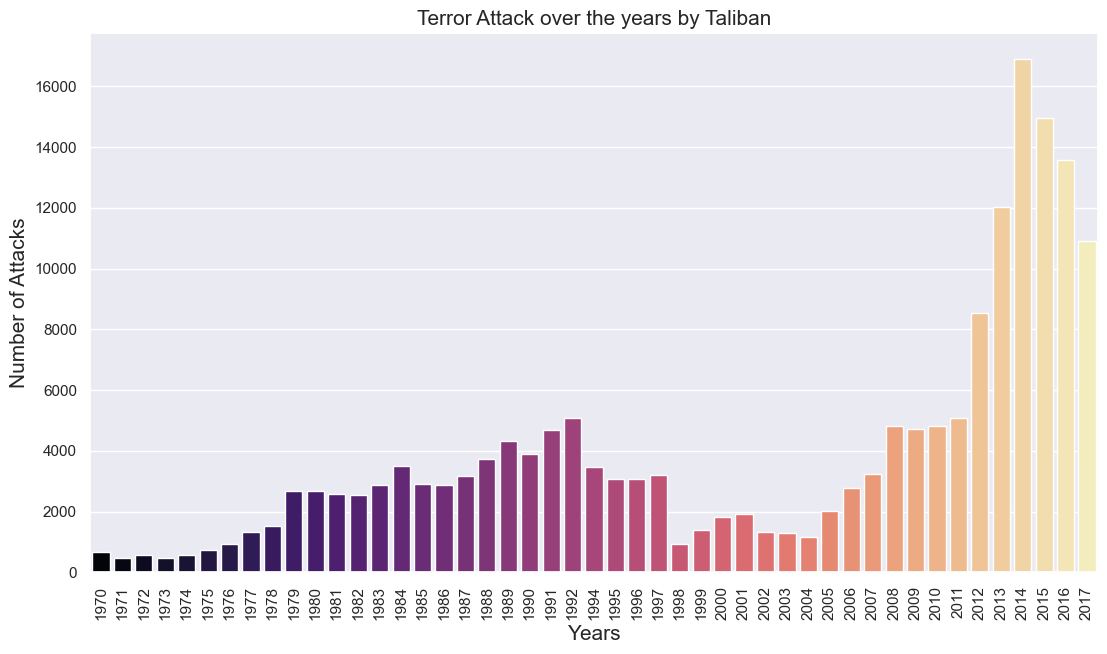

In [79]:
# Terror Attacks by Taliban over the Years
# Terror Attacks by Taliban over the Years
plt.figure(figsize = (13,7))
sns.barplot(x = df['Year'].value_counts().index,y = df['Year'].value_counts().values, palette = 'magma')
plt.title('Terror Attack over the years by Taliban',fontsize=15)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.xticks(rotation= 90)

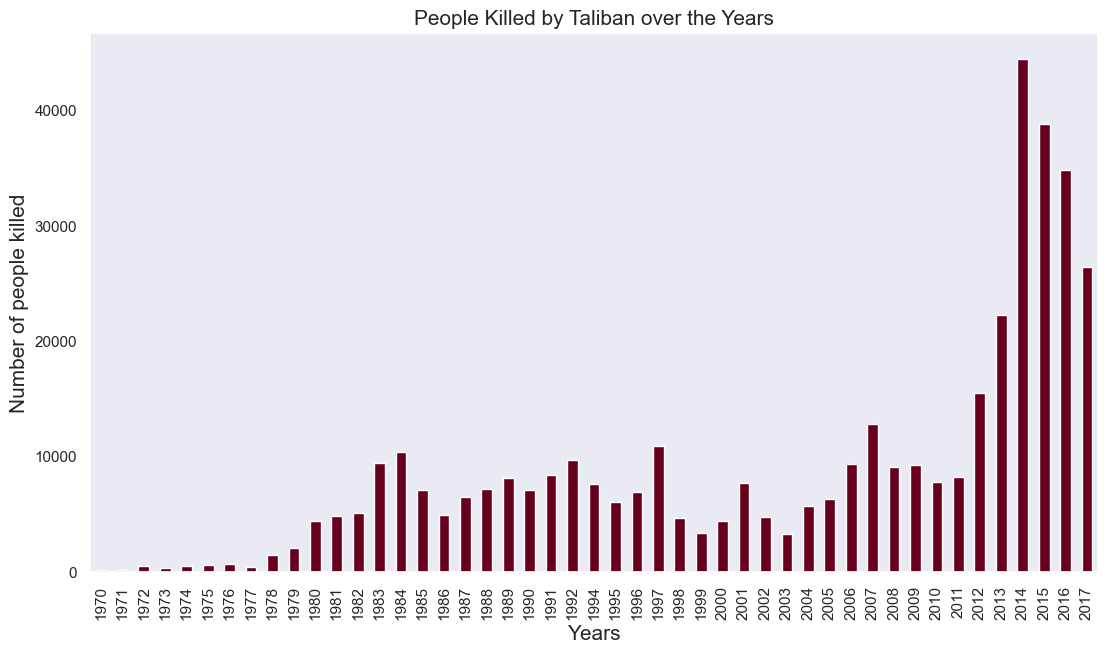

In [80]:
plt.figure(figsize=(13,7))
df.groupby(['Year'])['Kills'].sum().plot(kind='bar',colormap='RdBu')
plt.title('People Killed by Taliban over the Years',fontsize=15)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Number of people killed',fontsize=15)
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [81]:
# creating new dataframe for the year 2014
df_2014 = df[df.Year == 2014]

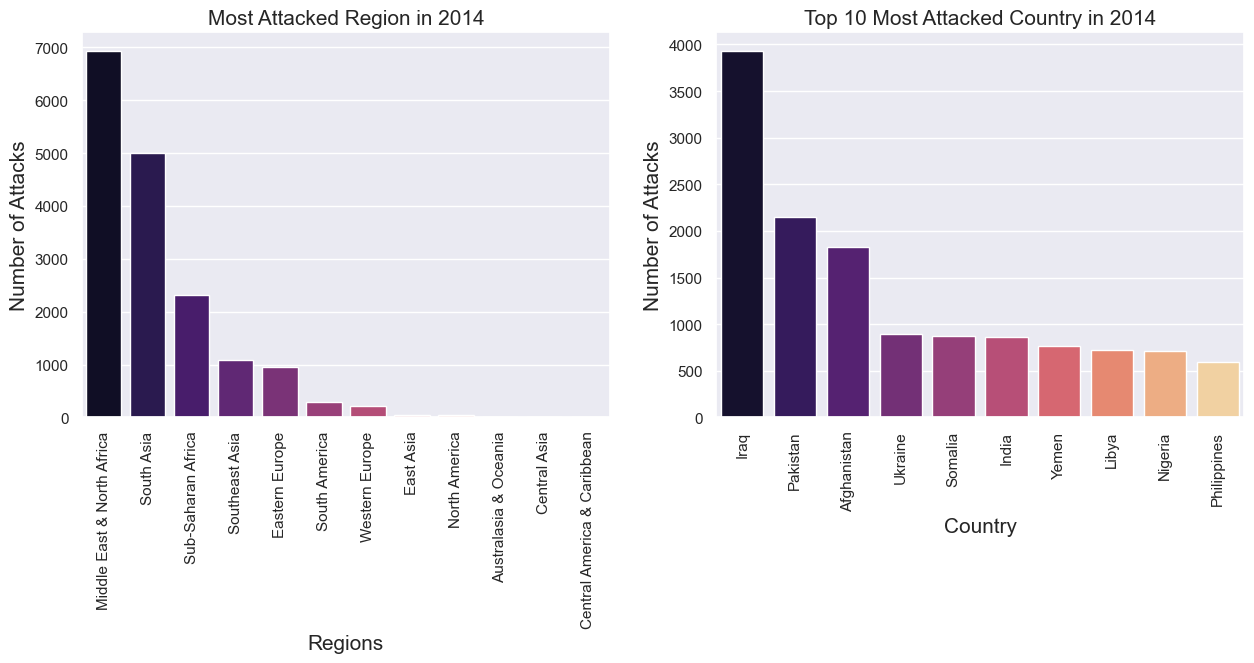

In [82]:
# Regions that were attacked most in 2014
plt.subplot(1,2,1)
sns.barplot(x = df_2014['Region'].value_counts().index,y = df_2014['Region'].value_counts().values,palette='magma')
plt.title('Most Attacked Region in 2014',fontsize=15)
plt.xlabel('Regions',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.xticks(rotation=90)

# top 10 countries that were attacked most in 2014
plt.subplot(1,2,2)
sns.barplot(x = df_2014['Country'].value_counts().head(10).index,y = df_2014['Country'].value_counts().head(10).values,palette='magma')
plt.title('Top 10 Most Attacked Country in 2014',fontsize=15)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 5)

## Conclusion
**After performing the Exploratory Data Analysis we get the following insights from the data:**

- Private Citizens and Property were attacked most followed by Military, Police, Government and so on.
- Middle East & North Africa was most affected among the top affected region. Most of the people in this region were either wounded or killed.
- Iraq was the country which was most affected by terror attacks and had maximum number of killed and wounded people.
- The State and City that was most affected was Baghdad
- In the last decade 2014 had most number of terror attacks. That was around 16500 attacks during this year which means on average 45 attacks per day.
- The most common attack type was Bombing/Explosion.
- Explosives have been consistently the most popular weapon of choice for terrorists.
- Taliban became more active since 2012 and they are responsible for the most of the terror attacks

**Recommendation**
- Since Private Citizens and Property are being targeted consistently so stronger security and surveillance should be provided, especially in the dense populated regions.
- More surveillance is required especially in the Middle East & North African Regions.
- Strict border policy should be implemented to prevent the movement of explosives between the regions.